In [1]:
from IPython.display import Image

In [2]:
import pandas as pd

In [3]:
df_shots = pd.read_csv('/Users/gianluigiboniglia/Downloads/df_shots.csv').drop('Unnamed: 0', axis=1)

# Linear Regression

**It is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables)**

# $y = \beta_0 + x\beta_1 + \epsilon$

# Problem with categorical variables

# Logistic regression

**It is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. Each class would be assigned a probability between 0 and 1, with a sum of one.**

# $\frac{y}{1-y} = b^{\beta_0 + x\beta_1 + \epsilon}$

# $y = \frac{1}{1 + b^{-(\beta_0 + x\beta_1 + \epsilon)}} = S_b(\beta_0 + x\beta_1 + \epsilon)$

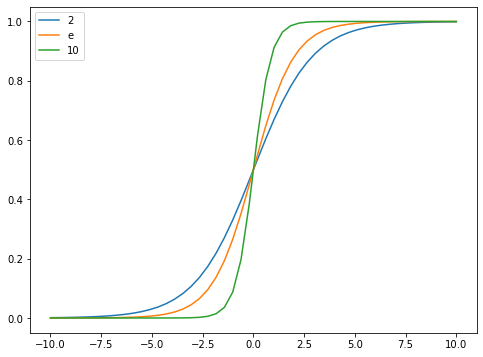

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, b):
    return 1/(1+b**(-x))

x_array = np.linspace(-10, 10)

plt.figure(figsize=(8,6))
plt.plot(x_array, sigmoid(x_array, 2), label = '2')
plt.plot(x_array, sigmoid(x_array, np.e), label = 'e')
plt.plot(x_array, sigmoid(x_array, 10), label = '10')
plt.legend()
plt.show()

In [5]:
import pandas as pd

In [6]:
df_shots = pd.read_csv('/Users/gianluigiboniglia/Downloads/df_shots.csv').drop('Unnamed: 0', axis=1)

In [7]:
df_shots.head()

,start_frame,end_frame,event_type,origin_pos_x,origin_pos_y,destination_pos_x,destination_pos_y,is_header,is_goal,freeze_frame,from_set_pieces,from_free_kick,from_penalty
0,3230.175,3249.033025,Shot,0.899167,0.6275,1.000000,0.5400,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False
1,14167.350,14185.561050,Shot,0.870833,0.3775,0.977500,0.4850,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False
2,15756.100,15780.660425,Shot,0.849167,0.3875,1.000000,0.4475,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",True,False,False
3,20942.500,20985.413775,Shot,0.666667,0.1825,0.964167,0.4975,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,True,False
4,38033.125,38040.548225,Shot,0.894167,0.3800,0.934167,0.4075,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False


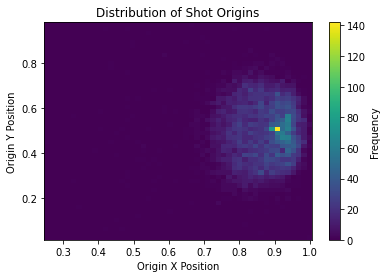

In [8]:
# @title Distribution of Shot Origins

import matplotlib.pyplot as plt

plt.hist2d(df_shots['origin_pos_x'], df_shots['origin_pos_y'], bins=50)
plt.xlabel('Origin X Position')
plt.ylabel('Origin Y Position')
plt.title('Distribution of Shot Origins')
_ = plt.colorbar(label='Frequency')

* **event_type**: only 'Shot' for this lab
* **start_frame & end_frame**: start and end frame of the given action within the match video (25 frames per second, so you could compute the total time the action has taken)
* **origin_pos_? & destination_pos_?**: origin and destination position for the x and y coordinates of the given action. Besides it is not explicit, these variables are still normalized!
* **is_header**: is the shot a "head-shot"? (Boolean variable)
* **freeze_frame**: information about each of the players in the on-ball team and the opponent one. YOU SHOULD READ THIS AS A DICTIONARY! We are going to see this later deeply.
* **from_set_pieces**: is the shot originated from a set piece play (i.e. corners) (Boolean variable)
* **from_free_kick**: is the shot originated from a free kick (Boolean variable)
* **from_penalty**: is the shot originated from a penalty (Boolean variable)

**Lets take a closer look to freeze_frame object**

In [9]:
df_shots.loc[0].freeze_frame

"[{'teammate': True, 'actor': False, 'keeper': False, 'location': [0.63738225, 0.3037944375]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.7728751666666667, 0.713117375]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.7747634166666667, 0.7248936625]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.7991360000000001, 0.563265875]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8010477083333334, 0.5313675875]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8506343333333334, 0.664471]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8648189583333333, 0.7899905625]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.8743958333333333, 0.5598908375]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8889644166666667, 0.521435125]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.9002543333333333, 0.3555984]}, {

**As always, we read it as a dictionary by using eval() function** (lets just see the first element)

In [10]:
eval(df_shots.loc[0].freeze_frame)[0]

{'teammate': True,
 'actor': False,
 'keeper': False,
 'location': [0.63738225, 0.3037944375]}

* **teammate**: is this player from the team who took the shot? (Boolean variable)
* **actor**: is this player taking the shot? (Boolean variable)
* **keeper**: is this player the goalkeeper? (Boolean variable)
* **location**: normalized location of the player (between [0,1]). Remember to use the pitch dimensions [105, 68] to unnormalize.

**IMPORTANT: it is possible that the number of players in the dictionary is less than 22 (eleven per team) due to the StatsBomb data architecture. Freeze frame data only saves information about the players available in the video image.** A quick example of StatsBomb data:

Lets do a quick visualization to get how to explore this dictionary. We first define our functions to drar the football pitch:

In [11]:
def _point_to_meters_inverse(p, w=105, h=68):
    return np.array([p[0] * h, p[1] * w])

def _point_to_meters(p, w=105, h=68):
    return np.array([p[0] * w, p[1] * h])

def _draw_field(width=68, height=105, fig_size=8, lines_color="#bcbcbc", background_color="white"):
    ratio = width / float(height)
    f, ax = plt.subplots(1, 1, figsize=(fig_size * ratio, fig_size), dpi=100)

    if background_color:
        ax.add_patch(patches.Rectangle((0, 0), width, height, color=background_color))

    line_pts = [
        [_point_to_meters([0, 0]), _point_to_meters([0, 1])],
        [_point_to_meters([1, 0]), _point_to_meters([1, 1])],
        [_point_to_meters([0, 1]), _point_to_meters([1, 1])],
        [_point_to_meters([0, 0]), _point_to_meters([1, 0])],
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], '-', alpha=0.8,
                lw=1.5, zorder=2, color=lines_color)

    line_pts = [
        [_point_to_meters([0.5, 0]), _point_to_meters([0.5, 1])],

        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], '-',
                alpha=0.8, lw=1.5, zorder=2, color=lines_color)

    # Circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 128, 232, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 308, 52, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    plt.axis('off')

    return f, ax

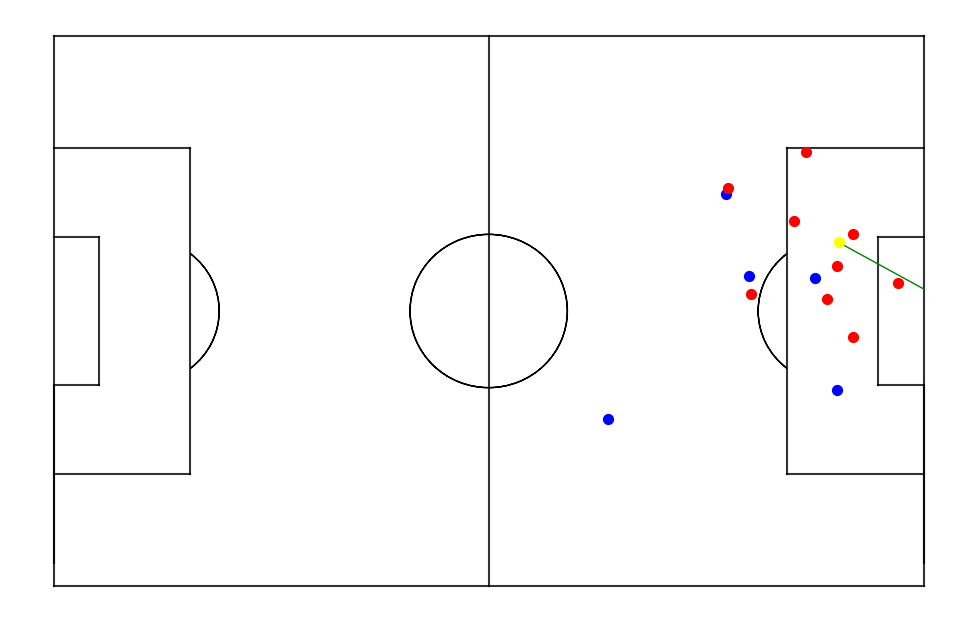

In [12]:
import matplotlib.pyplot as plt #we use this library to plot
import matplotlib.patches as patches #some more stuff to plot

ww=105 #here we define the "real" size of the football pitch in meters, hh=height and ww=width
hh=68

pitch_dim = np.array([ww,hh]) #we define a pitch dimension vector in case we want to unnormalize some positions

fig, ax = _draw_field(fig_size=8, width=ww, height=hh, lines_color='black') #football pitch figure and axis initialization

shot_to_plot = df_shots.loc[0]

for player in eval(shot_to_plot.freeze_frame): #always use eval()
    color = 'blue' if player['teammate'] == True else 'red' #we define teammate's color as blue, opponent color red
    color = 'yellow' if player['actor'] == True else color #we define actor's color as yellow

    ax.scatter(player['location'][0]*ww, player['location'][1]*hh, color=color, s=50, zorder=100)

ax.plot([shot_to_plot.origin_pos_x*ww, shot_to_plot.destination_pos_x*ww], [shot_to_plot.origin_pos_y*hh, shot_to_plot.destination_pos_y*hh],
        color='green', lw=1)
plt.show()

Notice there are just 6 players from the team who's taking the shot!

# Logistic Regression with Sci-kit learn

**We are going to use a simple logistic regression (NO PENALTY) to build an expected goal (xG) model.**

**Expected goals (xG) is a predictive model used to assess every goal-scoring chance, and the likelihood of scoring. A xG model computes for each chance the probability to score based on what we know about it (event-based variables)**.

**I'm going to build a quick baseline logistic regression model by only using the distance to the opponent goal from where each shot is taken.**

First, lets compute the distance to opponent goal and add the variable to our dataframe

In [56]:
def distance_to_goal(shot_location):
    opp_goal_pos = np.array([1,0.5]) * pitch_dim #this is the opponent goal location

    return np.linalg.norm(opp_goal_pos - shot_location)

In [57]:
df_shots['distance_to_goal'] = df_shots.apply(lambda row: distance_to_goal(np.array([row.origin_pos_x, row.origin_pos_y])*pitch_dim), axis=1)

Lets do some exploration through the histogram:

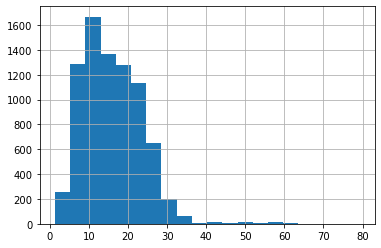

In [58]:
df_shots.distance_to_goal.hist(bins=20)
plt.show()

First, lets transform our boolean variables into [0,1]

In [16]:
df_shots["is_goal"] = df_shots["is_goal"].astype(int)
df_shots["is_header"] = df_shots["is_header"].astype(int)
df_shots["from_set_pieces"] = df_shots["from_set_pieces"].astype(int)
df_shots["from_free_kick"] = df_shots["from_free_kick"].astype(int)
df_shots["from_penalty"] = df_shots["from_penalty"].astype(int)

In [17]:
from sklearn.linear_model import LogisticRegression #we import the LogisticRegression class from the sklearn library
from sklearn.model_selection import train_test_split #we are going to split into train and test set, preventing overfit

X = df_shots.distance_to_goal
y = df_shots.is_goal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #split into train and test set

clf = LogisticRegression(random_state=0).fit(np.array(X_train).reshape(-1, 1), y_train) #we train with the train set
#array.reshape(-1,1) is necessary due to using only 1 variable
y_pred = clf.predict_proba(np.array(X_test).reshape(-1,1)) #we predict with the test set

In [18]:
y_pred

array([[0.95247072, 0.04752928],
       [0.98002363, 0.01997637],
       [0.87750533, 0.12249467],
       ...,
       [0.95673322, 0.04326678],
       [0.948419  , 0.051581  ],
       [0.82687405, 0.17312595]])

**For each observation, we have a 2D array prediction, [probability class being 0, probability class being 1]**

**To evaluate our model we are going to use two methods:**
    
* **Calibration curve**: used to evaluate how calibrated a classifier is i.e., how the probabilities of predicting each class label differ. The x-axis represents the average predicted probability in each bin. The y-axis is the ratio of positives (the proportion of positive predictions)

* **ROC curve**: illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. We use area under ROC curve (AUC ROC) as a metric to evaluate our model. AUC = 0.5 for random classifiers, AUC=1 for perfect classifiers.

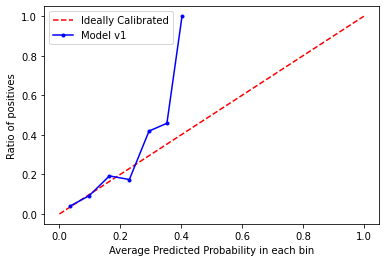

In [19]:
from sklearn.calibration import calibration_curve

x_c, y_c = calibration_curve(y_test, y_pred[:,1], n_bins=15)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c, x_c, marker = '.', color='b', label = 'Model v1')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

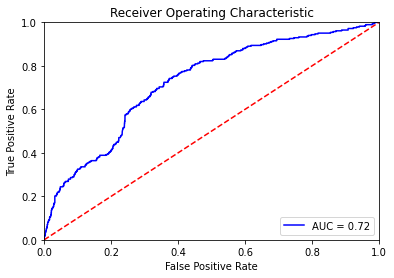

In [20]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Notice that we are facing an unbalanced classification problem, there lots of no-goals and few goals**:

In [21]:
print(f'Goals: {y_train.sum()}')
print(f'Total shots: {len(y_train)}')

Goals: 634
Total shots: 5593


We need to know the proportion

In [22]:
y_train.sum() / len(y_train)

0.1133559806901484

**Now we include this weight into the regressor:**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#We include the 'stratify' attribute in order to split the dataset with the same goal/no-goal proportion

clf = LogisticRegression(random_state=0, class_weight={1:1, 0:0.1133}).fit(np.array(X_train).reshape(-1, 1), y_train)
#we include the class weight as a dictionary:
y_pred = clf.predict_proba(np.array(X_test).reshape(-1,1))

In [24]:
y_pred

array([[0.84210894, 0.15789106],
       [0.83892124, 0.16107876],
       [0.58332071, 0.41667929],
       ...,
       [0.15484796, 0.84515204],
       [0.66053759, 0.33946241],
       [0.78099862, 0.21900138]])

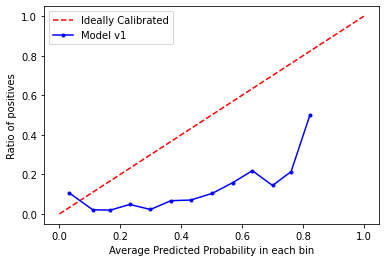

In [25]:
x_c, y_c = calibration_curve(y_test, y_pred[:,1], n_bins=15)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c, x_c, marker = '.', color='b', label = 'Model v1')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

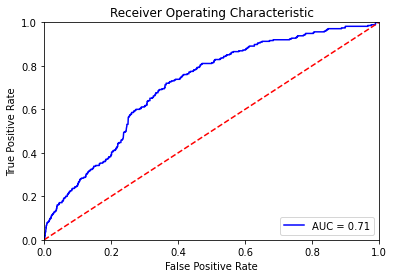

In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Check how the predicted goal probability depends on the shot distance**:

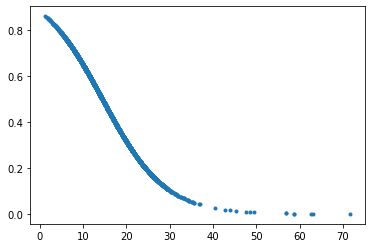

In [27]:
plt.plot(X_test, y_pred[:,1], '.')

**Let's try to improve our model by adding a new variable: The shot's angle to goal**:

Here you got a function that computes the angle to goal given a shot location:

In [53]:
def angle_to_goal(shot_location):

    v1 = np.array([105, (68+7.5)/2]) - shot_location #68/2 +- 7.5 are the locations of the goal posts!
    v2 = np.array([105, (68-7.5)/2]) - shot_location

    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))

    return np.arctan2(sinang, cosang)

In [54]:
df_shots['angle_to_goal'] = df_shots.apply(lambda row: angle_to_goal(np.array([row.origin_pos_x, row.origin_pos_y])*pitch_dim), axis=1)

In [55]:
df_shots.angle_to_goal #in radians

0       0.429868
1       0.401977
2       0.382451
3       0.155264
4       0.442236
          ...   
7985    0.304680
7986    0.612886
7987    1.221690
7988    0.680808
7989    0.772569
Name: angle_to_goal, Length: 7990, dtype: float64

24.629634366400968


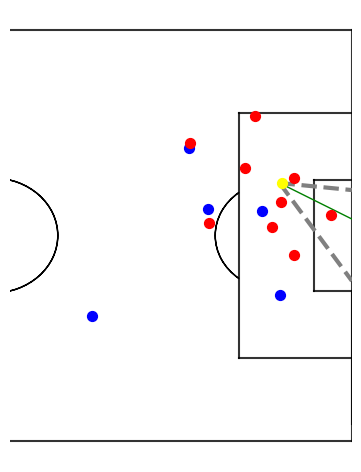

In [31]:
fig, ax = _draw_field(fig_size=6, width=50, height=hh, lines_color='black') #football pitch figure and axis initialization

shot_to_plot = df_shots.loc[0]
print(shot_to_plot.angle_to_goal *360 / (2*np.pi))

for player in eval(shot_to_plot.freeze_frame): #always use eval()
    color = 'blue' if player['teammate'] == True else 'red' #we define teammate's color as blue, opponent color red
    color = 'yellow' if player['actor'] == True else color #we define actor's color as yellow

    ax.scatter(player['location'][0]*ww, player['location'][1]*hh, color=color, s=50, zorder=100)

ax.plot([shot_to_plot.origin_pos_x*ww, shot_to_plot.destination_pos_x*ww], [shot_to_plot.origin_pos_y*hh, shot_to_plot.destination_pos_y*hh],
        color='green', lw=1)
ax.plot([shot_to_plot.origin_pos_x*ww, 105], [shot_to_plot.origin_pos_y*hh, 68/2+7.5], lw=3, ls='--', color='grey')
ax.plot([shot_to_plot.origin_pos_x*ww, 105], [shot_to_plot.origin_pos_y*hh, 68/2-7.5], lw=3, ls='--', color='grey')
plt.xlim(55, 105)
plt.show()

**So we want to compute the angle between the two grey dashed lines!**

**Once we have included our new variable, lets build a new model**:

In [32]:
X2 = df_shots[['distance_to_goal', 'angle_to_goal']]
y2 = df_shots.is_goal

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0, stratify=y)
#We include the 'stratify' attribute in order to split the dataset with the same goal/no-goal proportion

clf2 = LogisticRegression(random_state=0, class_weight={1:1, 0:0.1133}).fit(X_train2, y_train2)
y_pred2 = clf2.predict_proba(X_test2)

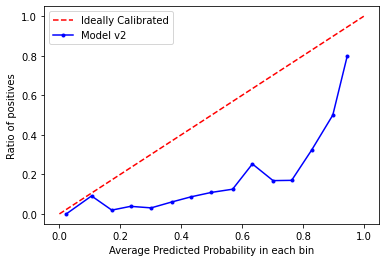

In [33]:
x_c2, y_c2 = calibration_curve(y_test2, y_pred2[:,1], n_bins=15)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c2, x_c2, marker = '.', color='b', label = 'Model v2')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

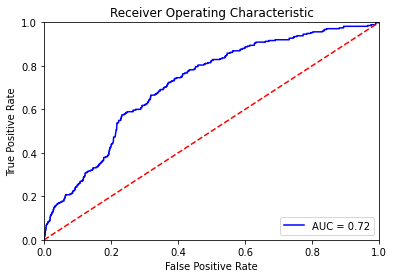

In [34]:
fpr2, tpr2, threshold = metrics.roc_curve(y_test2, y_pred2[:,1])
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

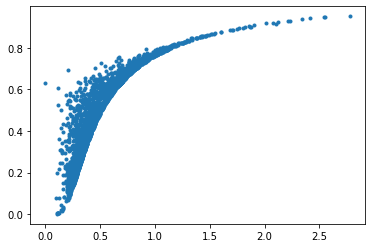

In [35]:
plt.plot(X_test2.angle_to_goal, y_pred2[:,1], '.')

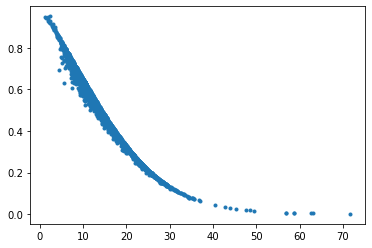

In [36]:
plt.plot(X_test2.distance_to_goal, y_pred2[:,1], '.')

**Quick code to compute a xG map within the football pitch**:

In [37]:
import tqdm.notebook as notebook

x_array = np.linspace(0.5, 104.5, 50)
y_array = np.linspace(0.5, 67.5, 30)

xG_map = np.zeros((len(y_array), len(x_array)))

df_xG_map = pd.DataFrame()
for x in notebook.tqdm(range(len(x_array))):
    for y in range(len(y_array)):
        shot_location = np.array([x_array[x], y_array[y]])
        df_xG_map = pd.concat([df_xG_map, pd.DataFrame({'x': x, 'y': y, 'distance_to_goal': distance_to_goal(shot_location),
                                      'angle_to_goal': angle_to_goal(shot_location)}, index=[x+y])])

df_xG_map['xG'] = clf2.predict_proba(df_xG_map[['distance_to_goal', 'angle_to_goal']])[:,1]

  0%|          | 0/50 [00:00<?, ?it/s]

In [38]:
for x in notebook.tqdm(range(len(x_array))):
    for y in range(len(y_array)):
        xG_map[y,x] = df_xG_map.loc[(df_xG_map.x==x) & (df_xG_map.y==y)].xG

  0%|          | 0/50 [00:00<?, ?it/s]

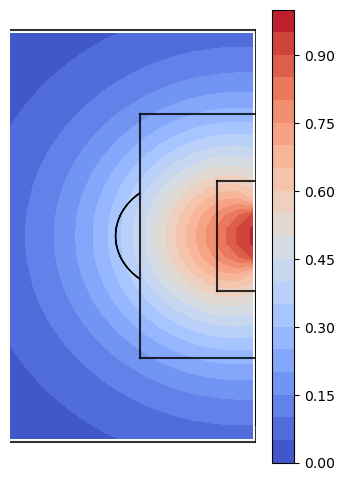

In [39]:
fig, ax = _draw_field(fig_size=6, width=45, height=hh, lines_color='black')

cs = ax.contourf(x_array, y_array, xG_map, 100, levels=20, vmin=0, vmax=1, cmap= 'coolwarm', zorder=1)
cbar = plt.colorbar(cs, ax=ax)
plt.xlim(70,105)
plt.show()

**In the following cell, I import my personal xG model, so you can compare your results with it. Notice that it is impossible that you get equal or better results by using a simple logistic regression, but keep it as "perfect" xG model reference**:

**To sum it up, let's check the calibration curve for the three models (two tested, and my personal one)**

model v2 is slighlty better calibrated than model v1 at low probabilities, but still far from the teacher model.

**Lastly, lets introduce SHAP library:**

**SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory.**

See further documentation:
https://shap.readthedocs.io/en/latest/index.html

**QUICK SHAP IDEA: it describes each variable's importance within the given model**

Lets do a quick example with our v2 model:

## **SHAP library's beewsarm plot output:**

Firstly, shap's beesarm plot shows us the model's feature importance, from top to bottom. In our model v2 case, distance to goal is the most important feature.

Each point in the beewsarm plot correspond to a single observation (in our case, a single shot event). For a logistic regression problem, positive SHAP values correspond to feature's importance towards the 1 output (goal) and negative SHAP values correspond to feature's importance towards 0 output. Also, the color of each point represent the observation feature's value. This is, lower (blue) values of distance to goal feature leads to better xG output (towards 1 output), while bigger values leads our model's output to 0 (worse xG output). Again, bigger values of angle to goal feature leads to better xG output.

## EXERCISES

#### **1. Why do we use angle to goal as the available angle between the shot and the posts, and not the angle towards the goal's center? (1 point)**

Calculating expected goals by focusing on the angle between the shot and the goalposts provides a more accurate assessment of the scoring opportunity available. This approach takes into account the positioning of the goalkeeper and defenders, which can impact the likelihood of scoring. In contrast, measuring the angle to the center of the goal does not factor in these defensive elements, potentially leading to less precise calculations.

#### **2. FEATURE ENGINEERING: Build 5 more features to implement the model with (two more besides distance and angle to goal) (5 points)**

**You can use the is_header, is_penalty, etc. features included in the dataframe to improve your model's performance, but I want you to build 5 NEW features**

**For this exercise feel free to use the following functions (not mandatory, though):**

Angle between two vectors:

In [40]:
def v_angle(v1, v2): #two vectors v1, v2 in numpy array format

    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))

    return np.arctan2(sinang, cosang)

Angle between two points, with respect to the x-axis:

In [41]:
def p_angle(p1, p2): #two points p1, p2 in numpy array format THE ORDER MATTERS, ALWAYS IN FORWARD DIRECTION p1 -> p2 != p2 -> p1

    return np.arctan2(p2[1] - p1[1], p2[0] -  p1[0])

Check if point is contained inside a set of points' hull (Boolean output!):

In [42]:
from scipy.spatial import ConvexHull

def point_in_hull(points_to_build_hull, point, tolerance=1e-12):

    hull = ConvexHull(pos_positions)

    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= tolerance)
        for eq in hull.equations)

In [43]:
import pandas as pd
data = pd.read_csv('/Users/gianluigiboniglia/Downloads/df_shots.csv')
df_shots = pd.DataFrame(data)
df_shots.head()

,Unnamed: 0,start_frame,end_frame,event_type,origin_pos_x,origin_pos_y,destination_pos_x,destination_pos_y,is_header,is_goal,freeze_frame,from_set_pieces,from_free_kick,from_penalty
0,0,3230.175,3249.033025,Shot,0.899167,0.6275,1.000000,0.5400,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False
1,1,14167.350,14185.561050,Shot,0.870833,0.3775,0.977500,0.4850,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False
2,2,15756.100,15780.660425,Shot,0.849167,0.3875,1.000000,0.4475,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",True,False,False
3,3,20942.500,20985.413775,Shot,0.666667,0.1825,0.964167,0.4975,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,True,False
4,4,38033.125,38040.548225,Shot,0.894167,0.3800,0.934167,0.4075,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False


In [44]:
df_shots["is_goal"] = df_shots["is_goal"].astype(int)
df_shots["is_header"] = df_shots["is_header"].astype(int)
df_shots["from_set_pieces"] = df_shots["from_set_pieces"].astype(int)
df_shots["from_free_kick"] = df_shots["from_free_kick"].astype(int)
df_shots["from_penalty"] = df_shots["from_penalty"].astype(int)

In [45]:
import numpy as np

def opponents_in_penalty_area(shot_row):
    # Define the limits of the penalty area
    penalty_area_limits = {
        'x_min': 0.838,
        'x_max': 1.0,
        'y_min': 0.285,
        'y_max': 0.715
    }

    # Count the number of opponents inside the penalty area
    opponents_inside = sum(
        1 for player in eval(shot_row.freeze_frame)  # Iterate through each player in the freeze frame
        if (penalty_area_limits['x_min'] <= player['location'][0] <= penalty_area_limits['x_max'] and
            penalty_area_limits['y_min'] <= player['location'][1] <= penalty_area_limits['y_max'] and
            not player['teammate'])  # Check if the player is an opponent
    )

    return opponents_inside  


df_shots['opponents_in_penalty_area'] = df_shots.apply(opponents_in_penalty_area, axis=1)

In [46]:
def players_between_ball_and_keeper(shot_row):
    penalty_area_limits = {
        'x_min': 0.838,
        'x_max': 1.0,
        'y_min': 0.285,
        'y_max': 0.715
    }
    
    shooter_location = None
    keeper_location = None

    # Find the position of the ball carrier and the goalkeeper
    for player in eval(shot_row.freeze_frame):
        if player['actor']:  # If the player is the ball carrier
            shooter_location = player['location']
        elif player['keeper']:  # If the player is the goalkeeper
            keeper_location = player['location']

    # If either the shooter or the goalkeeper is not found, return 0
    if shooter_location is None or keeper_location is None:
        return 0  

    # Extract the x-coordinates of the shooter and the goalkeeper
    shooter_x = shooter_location[0]
    keeper_x = keeper_location[0]

    # Count the number of players (including teammates and opponents) between the shooter and the goalkeeper
    players_inside = sum(
        1 for player in eval(shot_row.freeze_frame)
        if (penalty_area_limits['x_min'] <= player['location'][0] <= penalty_area_limits['x_max'] and
            penalty_area_limits['y_min'] <= player['location'][1] <= penalty_area_limits['y_max'] and
            ((shooter_x < keeper_x and player['location'][0] > shooter_x and player['location'][0] < keeper_x) or
             (shooter_x > keeper_x and player['location'][0] < shooter_x and player['location'][0] > keeper_x)))  # Check if the player is between the shooter and the goalkeeper
    )

    return players_inside  # Return the count of players between the ball and the goalkeeper

# Apply the function to the DataFrame and create a new column for the count of players between the ball and the goalkeeper
df_shots['players_between_ball_and_keeper'] = df_shots.apply(players_between_ball_and_keeper, axis=1)

In [47]:
def distance_to_keeper(shot_row, pitch_dim):
    shooter_location = None
    keeper_location = None

    # Iterate through players in the freeze frame to find positions
    for player in eval(shot_row.freeze_frame):
        if player['actor']:  # Identify the ball carrier
            shooter_location = np.array(player['location']) * pitch_dim  # Convert location to pitch dimensions
        elif not player['teammate'] and player['keeper']:  # Identify the opponent's goalkeeper
            keeper_location = np.array(player['location']) * pitch_dim  # Convert location to pitch dimensions

    # If both shooter and goalkeeper locations are found, calculate the distance
    if shooter_location is not None and keeper_location is not None:
        distance = np.linalg.norm(shooter_location - keeper_location)  # Calculate Euclidean distance
        return distance
    else:
        return np.nan  # Return NaN if either location is not found

# Define pitch dimensions
pitch_dim = np.array([105, 68])

# Apply the function to the DataFrame and create a new column for distance to the goalkeeper
df_shots['distance_to_keeper'] = df_shots.apply(distance_to_keeper, axis=1, args=(pitch_dim,))

In [48]:
def opponents_within_3m(shot_row, pitch_dim):
    shooter_location = None
    num_opponents_within_3m = 0  # Initialize the counter for opponents within 3 meters

    # Find the position of the ball carrier (shooter)
    for player in eval(shot_row.freeze_frame):
        if player['actor']:  # Check if this player is the ball carrier
            shooter_location = np.array(player['location']) * pitch_dim  # Convert location to pitch dimensions
            break  # Exit the loop after finding the shooter

    # If the shooter's location is found, check for opponents nearby
    if shooter_location is not None:
        for player in eval(shot_row.freeze_frame):
            if not player['teammate'] and not player['keeper']:  # Check if the player is an opponent
                opponent_location = np.array(player['location']) * pitch_dim  # Convert opponent's location to pitch dimensions
                distance = np.linalg.norm(shooter_location - opponent_location)  # Calculate the distance

                # Increment the counter if the opponent is within 3 meters of the shooter
                if distance <= 3:
                    num_opponents_within_3m += 1

    return num_opponents_within_3m  # Return the count of opponents within 3 meters

# Define pitch dimensions
pitch_dim = np.array([105, 68])

# Apply the function to the DataFrame and create a new column for the count of opponents within 3 meters
df_shots['opponents_within_3m'] = df_shots.apply(opponents_within_3m, axis=1, args=(pitch_dim,))

In [49]:
def distance_to_nearest_player(shot_row, pitch_dim):
    shooter_location = None
    min_distance = np.inf  # Initialize the minimum distance to infinity

    # Find the position of the ball carrier (shooter)
    for player in eval(shot_row.freeze_frame):
        if player['actor']:  # Check if this player is the ball carrier
            shooter_location = np.array(player['location']) * pitch_dim  # Convert location to pitch dimensions
            break  # Exit the loop after finding the shooter

    # If the shooter's location is found, calculate distances to other players
    if shooter_location is not None:
        for player in eval(shot_row.freeze_frame):
            if player['actor']:  # Skip the ball carrier when measuring distance
                continue
            player_location = np.array(player['location']) * pitch_dim  # Convert the location of the other player to pitch dimensions
            distance = np.linalg.norm(shooter_location - player_location)  # Calculate the Euclidean distance

            # Update min_distance if a new minimum is found
            if distance < min_distance:
                min_distance = distance

    return min_distance  # Return the minimum distance to the nearest player

# Define pitch dimensions
pitch_dim = np.array([105, 68])

# Apply the function to the DataFrame and create a new column for the distance to the nearest player
df_shots['distance_to_nearest_player'] = df_shots.apply(distance_to_nearest_player, axis=1, args=(pitch_dim,))


In [50]:
df_shots.head()

,Unnamed: 0,start_frame,end_frame,event_type,origin_pos_x,origin_pos_y,destination_pos_x,destination_pos_y,is_header,is_goal,freeze_frame,from_set_pieces,from_free_kick,from_penalty,opponents_in_penalty_area,players_between_ball_and_keeper,distance_to_keeper,opponents_within_3m,distance_to_nearest_player
0,0,3230.175,3249.033025,Shot,0.899167,0.6275,1.000000,0.5400,0,0,"[{'teammate': True, 'actor': False, 'keeper': ...",0,0,0,6,2,8.850972,1,1.951065
1,1,14167.350,14185.561050,Shot,0.870833,0.3775,0.977500,0.4850,0,0,"[{'teammate': True, 'actor': False, 'keeper': ...",0,0,0,7,4,13.224295,0,3.143462
2,2,15756.100,15780.660425,Shot,0.849167,0.3875,1.000000,0.4475,0,0,"[{'teammate': True, 'actor': False, 'keeper': ...",1,0,0,6,7,14.943732,1,2.262193
3,3,20942.500,20985.413775,Shot,0.666667,0.1825,0.964167,0.4975,0,0,"[{'teammate': True, 'actor': False, 'keeper': ...",0,1,0,1,0,43.484123,0,9.375363
4,4,38033.125,38040.548225,Shot,0.894167,0.3800,0.934167,0.4075,0,0,"[{'teammate': True, 'actor': False, 'keeper': ...",0,0,0,9,10,10.131416,2,1.219023


#### **3. Build a model with the constructed features (plus the two initially given features), build the Calibration plot and the ROC Curve and compare your model with the three previous ones. (3 points)**

In [51]:
from sklearn.calibration import calibration_curve
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [65]:
# Select features and target
X3 = df_shots[['distance_to_goal', 'angle_to_goal', 'distance_to_keeper', 'players_between_ball_and_keeper',
                'distance_to_nearest_player', 'opponents_within_3m',
                'opponents_in_penalty_area', 'is_header', 'from_set_pieces', 'from_free_kick', 'from_penalty']]
y3 = df_shots.is_goal
y = df_shots.is_goal

# Imputation of missing values
imputer = SimpleImputer(strategy='mean')
X3 = imputer.fit_transform(X3)

# Scale the data
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

# Split the dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1, stratify=y)

# Train the model
clf3 = LogisticRegression(random_state=0, class_weight={1:1.3, 0:1}, max_iter=400).fit(X_train3, y_train3)

# Predict probabilities
y_pred3 = clf3.predict_proba(X_test3)

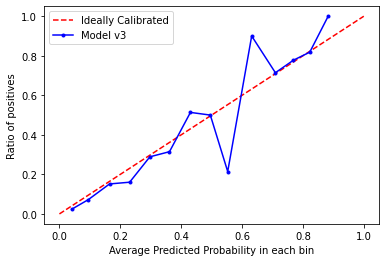

In [66]:
x_c3, y_c3 = calibration_curve(y_test3, y_pred3[:,1], n_bins=15)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c3, x_c3, marker = '.', color='b', label = 'Model v3')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

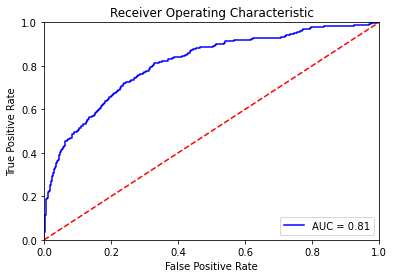

In [62]:
fpr3, tpr3, threshold = metrics.roc_curve(y_test3, y_pred3[:,1])
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

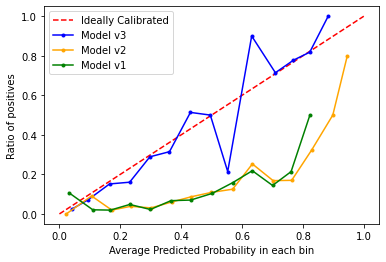

In [63]:
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c3, x_c3, marker = '.', color='b', label = 'Model v3')
plt.plot(y_c2, x_c2, marker = '.', color='orange', label = 'Model v2')
plt.plot(y_c, x_c, marker = '.', color='green', label = 'Model v1')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

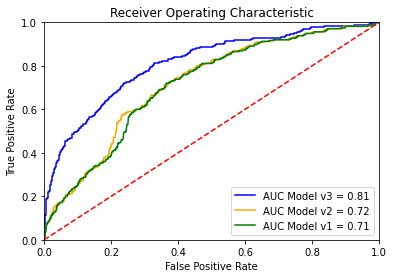

In [64]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC Model v3 = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'orange', label = 'AUC Model v2 = %0.2f' % roc_auc2)
plt.plot(fpr, tpr, 'green', label = 'AUC Model v1 = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()